 **Library yang digunakan**

In [2]:
import pandas as pd
import operator
import matplotlib.pyplot as plt
import re

**Membaca dataset berita neraca produksi**

In [4]:
news = pd.read_csv('/content/drive/MyDrive/JanganTidakTahu/BPS/BPS Hackathon/Berita/Berita Neraca Produksi (Q1-Q2 2021).csv', delimiter=';')

In [5]:
news['bias_positif'] = (((news['sentimen_berita'] == 'Negatif') | (news['sentimen_berita'] == 'Netral')) & (news['sentimen_kutipan'] == 'Positif'))*1
news['bias_negatif'] = (((news['sentimen_berita'] == 'Positif') | (news['sentimen_berita'] == 'Netral')) & (news['sentimen_kutipan'] == 'Negatif'))*1
news['bias_netral'] = (((news['sentimen_berita'] == 'Positif') | (news['sentimen_berita'] == 'Negatif')) & (news['sentimen_kutipan'] == 'Netral'))*1
news['bias_jujur'] = ((news['sentimen_berita'] == news['sentimen_kutipan']))*1

In [6]:
news.head()

id  sumber kodekat  ... bias_negatif bias_netral bias_jujur
0  00e3395ef29  Antara       J  ...            0           0          1
1  00fadafbe7d  Antara       A  ...            1           0          0
2  0126ee19f2a   Detik       F  ...            0           0          1
3  0133f12a935   Detik       D  ...            0           0          1
4  01382b466ed  Antara       K  ...            0           0          1

[5 rows x 24 columns]

In [9]:
for i in range(news.shape[0]):
  news['nama_tokoh'][i] = re.sub("Alami", "", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Diobati \(Lihat", "", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Joko Widodo (Jokowi)", "Joko Widodo", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Jokowi", "Joko Widodo", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Airlangga", "Airlangga Hartarto", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Airlangga Hartarto Hartarto", "Airlangga Hartarto", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Menjadi Jutawan", "", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Joko Widodo (Jokowi)", "Joko Widodo", news['nama_tokoh'][i])
  news['nama_tokoh'][i] = re.sub("Joko Widodo (Joko Widodo)", "Joko Widodo", news['nama_tokoh'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [59]:
bias_positif_ = list(news['bias_positif'].values)
bias_negatif_ = list(news['bias_negatif'].values)
netral_ = list(news['bias_netral'].values) 

In [60]:
nama_tokoh__ = []
for i in range (len(news['nama_tokoh'])):
    nama_tokoh_ = re.sub(r"'", "", news['nama_tokoh'][i][1:-1]).split(', ')
    nama_tokoh__.append(nama_tokoh_)

In [61]:
dic_bias_positif = {}
dic_bias_negatif = {}
dic_netral = {}

for count, tokoh in enumerate(nama_tokoh__):
    for namanya in tokoh:
        if bias_positif_[count] == 1:
            if namanya not in dic_bias_positif:
                dic_bias_positif[namanya] = 0
            else:
                dic_bias_positif[namanya] += 1
        elif bias_negatif_[count] == 1:
            if namanya not in dic_bias_negatif:
                dic_bias_negatif[namanya] = 0
            else:
                dic_bias_negatif[namanya] += 1
        elif netral_[count] == 1:
            if namanya not in dic_netral:
                dic_netral[namanya] = 0
            else:
                dic_netral[namanya] += 1

In [62]:
def Sort(sub_li):
    l = len(sub_li)
    for i in range(0, l):
        for j in range(0, l-i-1):
            if (sub_li[j][1] > sub_li[j + 1][1]):
                tempo = sub_li[j]
                sub_li[j]= sub_li[j + 1]
                sub_li[j + 1]= tempo
    return sub_li

In [63]:
positif_biasnya = list(reversed(Sort(list(dic_bias_positif.items()))))
negatif_biasnya = list(reversed(Sort(list(dic_bias_negatif.items()))))
netral_biasnya = list(reversed(Sort(list(dic_netral.items()))))

In [64]:
def tokoh_bias(list_):
    bias = []
    for count, tokoh_bias_ in enumerate(list_):
        if list(tokoh_bias_)[0] != "":
            bias.append(tokoh_bias_)
    return bias

In [71]:
pos = tokoh_bias(positif_biasnya)

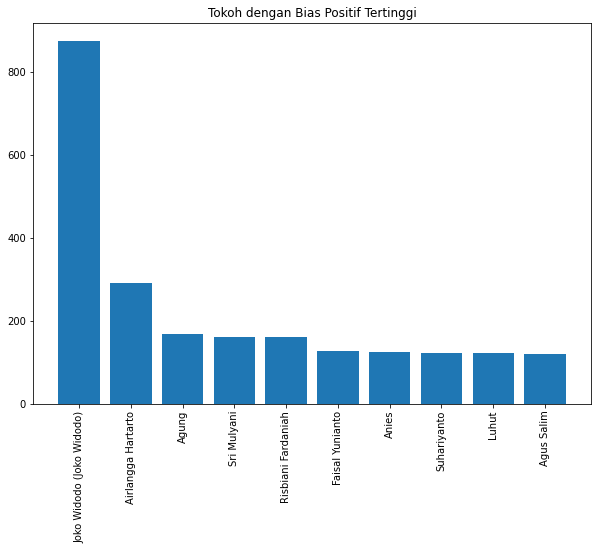

In [91]:
names = [pos[0][0], pos[1][0], pos[3][0], pos[4][0], pos[5][0], pos[6][0], pos[7][0], pos[8][0], pos[9][0], pos[10][0]]
values = [pos[0][1], pos[1][1], pos[3][1], pos[4][1], pos[5][1], pos[6][1], pos[7][1], pos[8][1], pos[9][1], pos[10][1]]

plt.figure(figsize=(10, 7))

plt.bar(names, values)
plt.title('Tokoh dengan Bias Positif Tertinggi')
plt.xticks(rotation=90)
plt.show()

In [89]:
sum(list(x[1] for x in pos))

21222

In [93]:
print([pos[0][1]/21222, pos[1][1]/21222, pos[3][1]/21222, pos[4][1]/21222, pos[5][1]/21222, pos[6][1]/21222, pos[7][1]/21222, pos[8][1]/21222, pos[9][1]/21222, pos[10][1]/21222])

[0.041136556403731976, 0.013665064555649798, 0.00791631325982471, 0.007539345961737819, 0.007539345961737819, 0.005937234944868533, 0.00584299312034681, 0.005748751295825087, 0.005748751295825087, 0.005607388559042503]


 **Membaca dataset job vacancy**

In [22]:
job = pd.read_excel('/content/drive/MyDrive/JanganTidakTahu/BPS/BPS Hackathon/job vacancy/raw.xlsx')
job_ = job.values

agregat = pd.read_csv('/content/drive/MyDrive/JanganTidakTahu/BPS/BPS Hackathon/job vacancy/agregat.csv', delimiter=';')
agregat_ = agregat.values

In [ ]:
colm_angka = ['salary_min', 'salary_max', 'ads_start', 'ads_end']
for col in job.columns:
  if col in colm_angka:
    job[col] = job[col].fillna(0)
  else:
    job[col] = job[col].fillna("")

In [ ]:
job.head(20)

industry  ...         pend_min
0                  retail distribusi  ...               D2
1               pendidikan pelatihan  ...  Tidak Tercantum
2                  it telekomunikasi  ...  Tidak Tercantum
3                    makanan minuman  ...               S1
4                    makanan minuman  ...              SMK
5                  it telekomunikasi  ...  Tidak Tercantum
6             busana tekstil fashion  ...  Tidak Tercantum
7               kecantikan kesehatan  ...  Tidak Tercantum
8              konsultan legal riset  ...  Tidak Tercantum
9          restauran layanan makanan  ...              SMA
10                manufaktur lainnya  ...  Tidak Tercantum
11                     manufacturing  ...  Tidak Tercantum
12         layanan kesehatan farmasi  ...  Tidak Tercantum
13               seni desain fashion  ...              SMA
14               seni desain fashion  ...              SMA
15                 retail distribusi  ...  Tidak Tercantum
16                manufaktur lainnya  ...  Tidak Tercantum
17                 retail distribusi  ...  Tidak Tercantum
18             konsultan legal riset  ...  Tidak Tercantum
19  business process outsourcing bpo  ...              SMA

[20 rows x 22 columns]

 **Fungsi pencarian**

In [ ]:
def cari(dong):

  lpg = []
  for col in job.columns:
    unik = []
    for item in job[col]:
        unik.append(item)
    lpg.append(unik)

  elpigi = []
  for col_ in range(len(lpg)):
    dict_ = {}
    for key in lpg[col_]:
      list_kata = []
      if type(key) == str:
        for masukin in key.split():
          list_kata.append(masukin)
        if key not in dict_:
          dict_[key] = list_kata
      elif type(key) == float:
        if key not in dict_:
          dict_[key] = str(int(key))
      elif type(key) == int:
        if key not in dict_:
          dict_[key] = str(key)
    elpigi.append(dict_)

  keyword_ = dong.split(" ")
  ketemu = []
  angka = [6,7,10,11]
  for count, col__ in enumerate(elpigi):
    if count not in angka:
      for hitung, key in enumerate(list(col__.values())):
        if [value for value in key if value in keyword_] == keyword_:
          ketemu.append(job_[job_[:,count]==list(col__.keys())[hitung]])
    else:
      for hitung, key in enumerate(list(col__.values())):
        if key == dong:
          ketemu.append(job_[job_[:,count]==list(col__.keys())[hitung]])

  return ketemu

**Fungsi Persebaran**

In [81]:
def peta(persebaran):

  dic = {}
  for value in job[persebaran]:
    if value not in dic:
      dic[value] = 0
    else:
      dic[value] += 1

  sorted_d = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
  keys = list(sorted_d.keys())[:10]
  values = list(sorted_d.values())[:10]
  plt.bar(keys, values)
  plt.xticks(rotation=90)
  plt.title('Persebaran lowongan kerja berdasarkan lokasi')
  
  return plt.show()

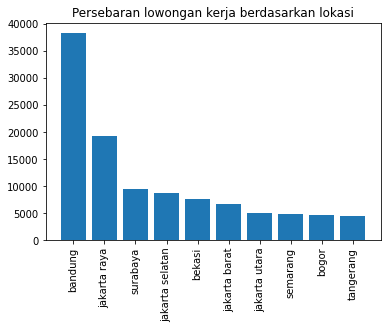

In [82]:
peta('location')

In [97]:
values

[38306, 19226, 9441, 8661, 7597, 6688, 5079, 4829, 4557, 4517]

In [99]:
print(38306/164913, 19226/164913, 9441/164913, 8661/164913, 7597/164913, 6688/164913, 5079/164913, 4829/164913, 4557/164913, 4517/164913)

0.2322800506933959 0.11658268299042525 0.057248367320951045 0.052518600716741554 0.046066713964332706 0.04055471672942703 0.030798057157410273 0.029282106322727743 0.02763275181459315 0.027390199681043944
